In [23]:
#This Analysis is for renewable and non-renewable share of energy production.


In [24]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plot

In [25]:
df=pd.read_csv(r'C:/Users/Sumit/OneDrive/Documents/GITHUB IBM DA/India-Energy-Analytics-Model/POSOCO_data.csv')
print(df)

      yyyymmdd  NR: DemandMet  NR: PeakShortage  NR: EnergyMet  NR: HydroGen  \
0     20130102        36462.0            2049.0          766.0         99.00   
1     20130103            NaN               NaN            NaN           NaN   
2     20130104            NaN               NaN            NaN           NaN   
3     20130105            NaN               NaN            NaN           NaN   
4     20130106            NaN               NaN            NaN           NaN   
...        ...            ...               ...            ...           ...   
4218  20240721        81558.0             296.0         1884.0        395.99   
4219  20240722        80534.0             175.0         1901.0        396.35   
4220  20240723        82312.0             195.0         1880.0        395.38   
4221  20240724        80656.0               0.0         1826.0        387.36   
4222  20240725        81215.0             370.0         1835.0        382.98   

      NR: WindGen  NR: SolarGen  NR: En

In [26]:

df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'], format='%Y%m%d')

# Set 'yyyymmdd' as index
df.set_index('yyyymmdd', inplace=True)

# Resample data to monthly frequency, summing up the values
monthly_data = df.resample('M').sum()

# Group by year and sum the monthly values to get yearly data
yearly_data = monthly_data.resample('Y').sum()

# Reset index to view as DataFrame
yearly_data.reset_index(inplace=True)

print(yearly_data)




     yyyymmdd  NR: DemandMet  NR: PeakShortage  NR: EnergyMet  NR: HydroGen  \
0  2013-12-31      9608209.0          589100.0      217394.00      53614.00   
1  2014-12-31     13810822.0          828184.0      308496.00      66679.00   
2  2015-12-31     14203803.0          716449.0      314230.00      72581.00   
3  2016-12-31     15183071.0          423834.0      339437.00      73724.00   
4  2017-12-31     16411182.0          395539.0      360112.00      76958.00   
5  2018-12-31     16861702.0          318166.0      375041.00      70000.00   
6  2019-12-31     17595127.0          312677.0      386424.00      80263.00   
7  2020-12-31     17635855.0          189370.0      382242.00      78719.00   
8  2021-12-31     18694822.0          271629.0      407504.00      73739.00   
9  2022-12-31     20264761.0          241371.0      452086.00      79683.00   
10 2023-12-31     21022169.0          187388.0      466084.66      77820.69   
11 2024-12-31     13108550.0           62273.0      

C:\Users\Sumit\AppData\Local\Temp\ipykernel_13776\1598120496.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()
C:\Users\Sumit\AppData\Local\Temp\ipykernel_13776\1598120496.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = monthly_data.resample('Y').sum()


In [34]:
ap=yearly_data[['yyyymmdd','India: Coal']]
ap=ap.drop(index=range(0,5))
print(ap)

     yyyymmdd   India: Coal
5  2018-12-31  8.566600e+04
6  2019-12-31  9.226840e+05
7  2020-12-31  8.775240e+05
8  2021-12-31  1.000573e+06
9  2022-12-31  1.096671e+06
10 2023-12-31  1.258929e+06
11 2024-12-31  7.824581e+05


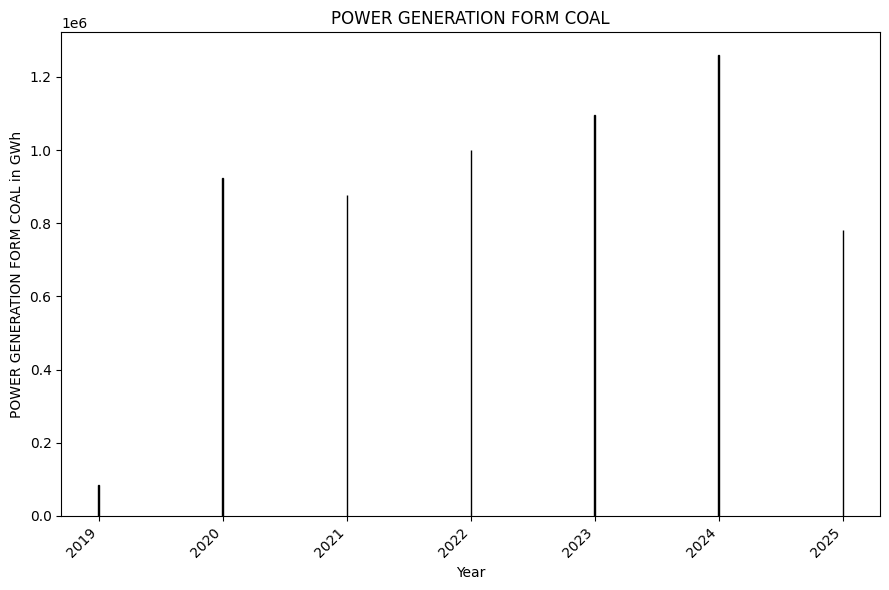

In [40]:
plot.figure(figsize=(9, 6))
plot.bar(ap['yyyymmdd'], ap['India: Coal'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('POWER GENERATION FORM COAL in GWh')
plot.title('POWER GENERATION FORM COAL')
plot.xticks(rotation=45, ha='right')
plot.tight_layout()
plot.show()

In [27]:
ap1=df[['yyyymmdd','CEA.DGR.GAS']]

ap1=ap1.drop(index=range(0,275))


# Convert the date column to datetime format
df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'], format='%Y%m%d')

# Extract the year from the date
df['year'] = df['yyyymmdd'].dt.year

# Group by the year and sum the values
yearly_sum1 = df.groupby('year')['CEA.DGR.GAS'].sum().reset_index()

# Rename the columns for clarity
yearly_sum1.columns = ['year', 'total_value']

# Display the resulting DataFrame
yearly_sum1=yearly_sum1.drop(index=6)
print(yearly_sum1)



KeyError: "None of [Index(['yyyymmdd', 'CEA.DGR.GAS'], dtype='object')] are in the [columns]"

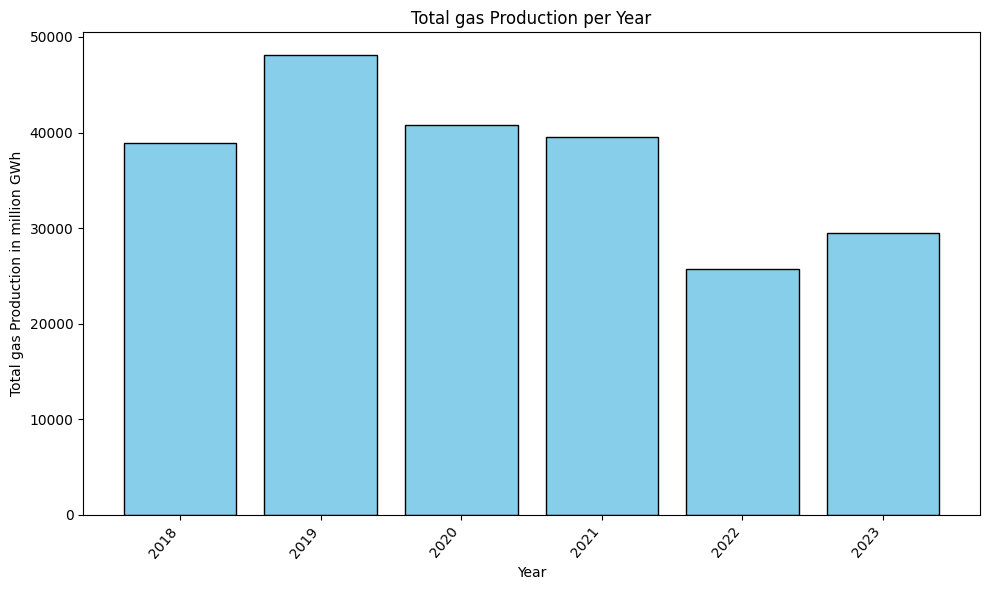

In [ ]:

plot.figure(figsize=(10, 6))
plot.bar(yearly_sum1['year'], yearly_sum1['total_value'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total gas Production in GWh')
plot.title('Total gas Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()

In [ ]:
hydro = df[['yyyymmdd','CEA.DGR.HYD']]

hydro=hydro.drop(index=range(0,275))
print(hydro)
df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'], format='%Y%m%d')
df['year'] = df['yyyymmdd'].dt.year
yearly_sum2 = df.groupby('year')['CEA.DGR.GAS'].sum().reset_index()
yearly_sum2.columns = ['year', 'total_value']
yearly_sum2=yearly_sum2.drop(index=6)
print(yearly_sum2)


       yyyymmdd  CEA.DGR.HYD
275  2019-01-01       234.63
276  2019-01-02       239.20
277  2019-01-03       248.49
278  2019-01-04       240.04
279  2019-01-05       232.93
...         ...          ...
2302 2024-07-20       592.51
2303 2024-07-21       567.16
2304 2024-07-22       572.56
2305 2024-07-23       572.51
2306 2024-07-24          NaN

[2032 rows x 2 columns]
   year  total_value
0  2018  38883.38905
1  2019  48082.70000
2  2020  40750.66000
3  2021  39533.89000
4  2022  25747.80000
5  2023  29449.78000


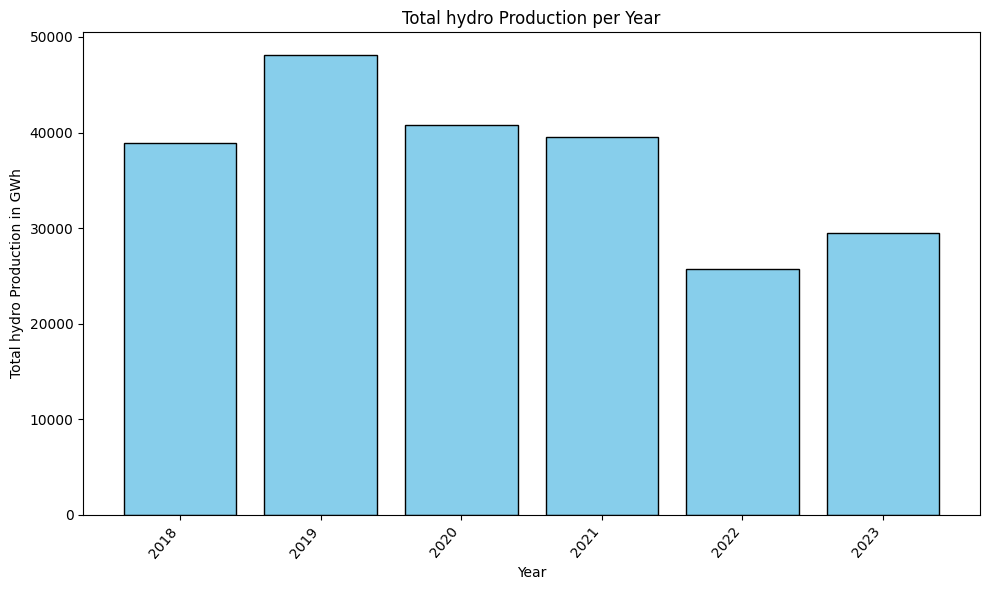

In [ ]:
plot.figure(figsize=(10, 6))
plot.bar(yearly_sum2['year'], yearly_sum2['total_value'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total hydro Production in GWh')
plot.title('Total hydro Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()